In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
def answer_one(): 
    
    cancer = load_breast_cancer()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)


In [3]:
all_data = answer_one()

In [4]:
all_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
all_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# РАЗБИЕНИЕ И НОРМАЛИЗАЦИЯ

In [6]:
labels = all_data['target'].values
feature_matrix = all_data[all_data.columns[:-1]].values


train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.33, random_state=42)

In [7]:
scaler = StandardScaler()
train_feature_matrix = scaler.fit_transform(train_feature_matrix)
test_feature_matrix = scaler.transform(test_feature_matrix)

In [8]:
train_feature_matrix.std(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [9]:
test_feature_matrix.std(axis = 0)

array([ 0.94847778,  1.03882945,  0.95909168,  0.89150423,  1.05370404,
        1.06359776,  1.02778598,  1.04503941,  1.03026447,  0.91102514,
        0.81605275,  1.14171936,  0.81440503,  0.71352996,  0.84159987,
        0.94794124,  0.95892352,  0.91998125,  1.05119653,  0.94711349,
        0.98027353,  1.04951402,  1.003868  ,  0.94611676,  0.95446426,
        1.12609781,  1.13432764,  1.03727774,  0.92772254,  1.06399677])

# ЛОГИСТИЧЕСКАЯ РЕГРЕСИЯ

In [10]:


lp = np.exp(np.linspace(-5, 5, 11))

lr_clf = LogisticRegression(max_iter=1000)
param_grid = [{'penalty': ['l1', 'l2'],
               'C': lp,
            
              }]

searcher = GridSearchCV(lr_clf, param_grid, cv=5,  verbose=10, n_jobs = 4)
searcher.fit(feature_matrix, labels)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1898s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1257s.) Setting batch_size=6.
[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:    8.2s finished
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': array([  6.73794700e-03,   1.83156389e-02,   4.97870684e-02,
         1.35335283e-01,   3.67879441e-01,   1.00000000e+00,
         2.71828183e+00,   7.38905610e+00,   2.00855369e+01,
         5.45981500e+01,   1.48413159e+02]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jo

In [11]:
searcher.best_score_

0.96836555360281196

In [12]:
searcher.best_params_

{'C': 148.4131591025766, 'penalty': 'l1'}

In [13]:

y_ans = searcher.best_estimator_.predict(test_feature_matrix)
print(classification_report(test_labels , y_ans))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87        67
         1.0       0.95      0.89      0.92       121

    accuracy                           0.90       188
   macro avg       0.89      0.90      0.89       188
weighted avg       0.90      0.90      0.90       188



In [14]:
clf = LogisticRegression(max_iter=1000)

clf.fit(train_feature_matrix, train_labels)
y_ans = clf.predict(test_feature_matrix)
print(classification_report(test_labels , y_ans))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        67
         1.0       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# PYTORCH

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.utils.data as utils
from torch.optim import Adam 

In [16]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 1))
model.add_module('l2', nn.Sigmoid())

In [17]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 30]), torch.Size([1])]


In [18]:
x = torch.tensor(train_feature_matrix[:3], dtype=torch.float32)
y = torch.tensor(train_labels[:3], dtype=torch.float32)

In [19]:
y_predicted = model(x)[:, 0]

In [20]:
y_predicted

tensor([0.4580, 0.4716, 0.4282], grad_fn=<SelectBackward>)

In [21]:
y

tensor([0., 1., 0.])

In [22]:
crossentropy = -(y*y_predicted.log() + (1-y)*torch.log(1-y_predicted))
loss = crossentropy.mean().unsqueeze(0)

In [23]:
crossentropy

tensor([0.6124, 0.7516, 0.5590], grad_fn=<NegBackward>)

In [24]:
X_test = torch.tensor(test_feature_matrix, dtype=torch.float32)
y_test = torch.tensor(test_labels, dtype=torch.float32)

In [25]:
opt = torch.optim.Adam(model.parameters(), lr=3e-4)

In [26]:
history = []
test_loss = []
for i in range(6000):
    
    # sample 256 random images
    ix = np.random.randint(0, len(train_feature_matrix), 64)
    x_batch = torch.tensor(train_feature_matrix[ix], dtype=torch.float32)
    y_batch = torch.tensor(train_labels[ix], dtype=torch.float32)
    
    # predict probabilities
    y_predicted = model(x_batch)[:,0]
    
    # compute loss on train
    crossentropy = -(y_batch*y_predicted.log() + (1-y_batch)*torch.log(1-y_predicted))
    loss = crossentropy.mean().unsqueeze(0)
    
    
    
    loss.backward()
    opt.step()
    opt.zero_grad() 
    
    history.append(loss.data.numpy())
    
    #loss on test
    y_pre = model(X_test)[:,0]
    cros = -(y_test*y_pre.log() + (1-y_test)*torch.log(1-y_pre))
    test_loss.append(cros.mean().unsqueeze(0).data.numpy())
    if i % 200 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.604
step #200 | mean loss = 0.401
step #400 | mean loss = 0.310
step #600 | mean loss = 0.257
step #800 | mean loss = 0.210
step #1000 | mean loss = 0.185
step #1200 | mean loss = 0.160
step #1400 | mean loss = 0.157
step #1600 | mean loss = 0.143
step #1800 | mean loss = 0.127
step #2000 | mean loss = 0.140
step #2200 | mean loss = 0.112
step #2400 | mean loss = 0.095
step #2600 | mean loss = 0.105
step #2800 | mean loss = 0.109
step #3000 | mean loss = 0.091
step #3200 | mean loss = 0.094
step #3400 | mean loss = 0.092
step #3600 | mean loss = 0.086
step #3800 | mean loss = 0.090
step #4000 | mean loss = 0.077
step #4200 | mean loss = 0.068
step #4400 | mean loss = 0.101
step #4600 | mean loss = 0.079
step #4800 | mean loss = 0.073
step #5000 | mean loss = 0.083
step #5200 | mean loss = 0.072
step #5400 | mean loss = 0.057
step #5600 | mean loss = 0.091
step #5800 | mean loss = 0.064


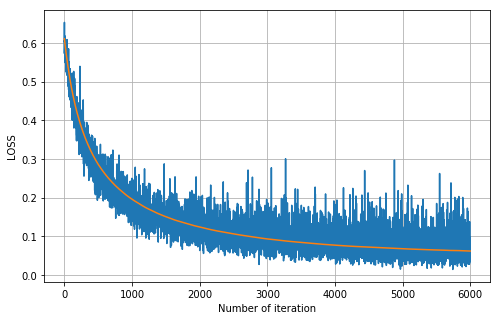

In [27]:

plt.figure(figsize=(8,5))
plt.plot(history)
plt.plot(test_loss)
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('LOSS')
plt.show()

In [28]:
predicted_y_test = model(torch.tensor(test_feature_matrix, dtype=torch.float32))
predicted_y_test = np.array(predicted_y_test > 0.5).astype('int').reshape(-1)

In [29]:
accuracy = np.mean(predicted_y_test == test_labels)

In [30]:
accuracy

0.98936170212765961

In [31]:
print(classification_report(test_labels , predicted_y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        67
         1.0       0.99      0.99      0.99       121

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

